# Modeling and Evaluation with data loaded from the CSV files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

## Let's get to know the data set we are working with

In [2]:
# Set the seed for reproducible results
seed = 123
np.random.seed(seed)

# Set plot style
sns.set_style("darkgrid")

# Load the data and get a sample of it
df = pd.read_csv("loan_resampling.csv")
df.sample(10)

,loan_status,principal,terms,age,gender,weekend,Bechalor,High School or Below,Master or Above,college
50,COLLECTION,800,15,29,0,1,0,1,0,0
127,PAIDOFF,1000,30,37,0,1,0,1,0,0
37,COLLECTION,1000,30,31,0,1,0,1,0,0
149,PAIDOFF,1000,30,26,1,0,0,1,0,0
19,COLLECTION,800,15,35,0,1,1,0,0,0
104,PAIDOFF,800,15,26,0,0,0,0,0,1
179,PAIDOFF,1000,30,21,0,0,0,1,0,0
53,COLLECTION,800,15,22,0,1,0,0,0,1
162,PAIDOFF,1000,30,35,0,0,0,1,0,0
158,PAIDOFF,1000,30,39,0,0,0,1,0,0


In [3]:
features = df.drop(["loan_status"], axis=1)
features.shape

(200, 9)

In [4]:
y = df["loan_status"].values
y.shape

(200,)

### Data normalization

In [6]:
from sklearn import preprocessing

# normalize the data
X = preprocessing.StandardScaler().fit(features).transform(features)
X[0:1]

array([[ 0.46597684, -1.04664756, -0.29329725, -0.41181385,  0.62360956,
        -0.36047677, -0.89543386, -0.10050378,  1.15133896]])

# Classification, which method suits best and gets the best accuracy

## Train Test Split

In [8]:
from sklearn.model_selection import train_test_split

# train split test variables
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=seed, stratify=y
)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (150, 9) (150,)
Test set: (50, 9) (50,)


## K-Nearest Neighbors

### Training and Predicting (To find the best k/neighbor)

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# for each k we will fit and predict the score of all k's
Ks = 31
neighbors = range(1, Ks)
mean_acc = np.zeros((Ks - 1))
std_acc = np.zeros((Ks - 1))

# for each k we will see the score in the train and test sets do see over or under fitting signs
train_acc = {}
test_acc = {}

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat_knn = knn.predict(X_test)

    mean_acc[k - 1] = np.mean(yhat_knn == y_test)
    std_acc[k - 1] = np.std(yhat_knn == y_test) / np.sqrt(yhat_knn.shape[0])

    train_acc[k] = knn.score(X_train, y_train)
    test_acc[k] = knn.score(X_test, y_test)

mean_acc * 100

array([68., 64., 72., 68., 60., 66., 68., 70., 70., 72., 64., 64., 64.,
       64., 64., 62., 64., 68., 68., 66., 64., 68., 68., 64., 68., 68.,
       68., 70., 70., 70.])

### Visualization

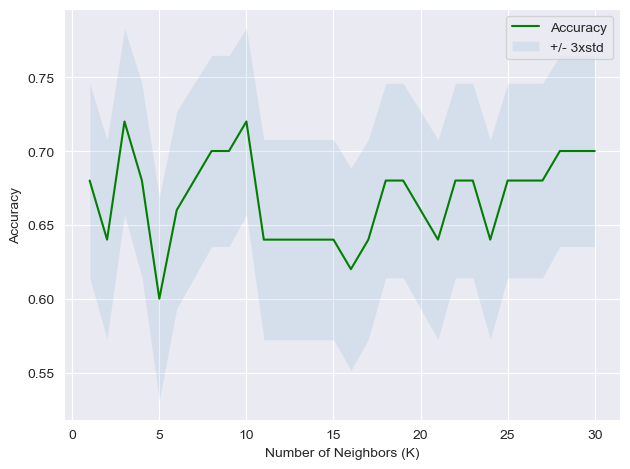

The best accuracy was 72 % with k= 3


In [10]:
plt.plot(range(1, Ks), mean_acc, "g")
plt.fill_between(
    range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10
)
plt.legend(("Accuracy", "+/­ 3xstd"))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.tight_layout()
plt.show()
best_k = mean_acc.argmax() + 1
print("The best accuracy was", int(mean_acc.max() * 100), "% with k=", best_k)

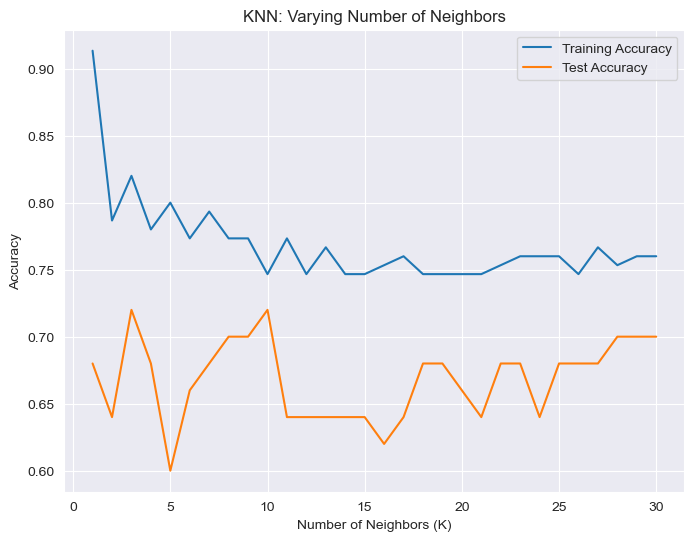

In [11]:
plt.figure(figsize=(8, 6))
plt.title("KNN: Varying Number of Neighbors")
plt.plot(neighbors, train_acc.values(), label="Training Accuracy")
plt.plot(neighbors, test_acc.values(), label="Test Accuracy")
plt.legend()
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.show()

### Modeling

In [12]:
k = best_k
eKNN = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
eKNN

KNeighborsClassifier(n_neighbors=3)

### Evaluate KNN Predict

In [13]:
yhat_knn_pred = eKNN.predict(X_test)
yhat_prob_knn = eKNN.predict_proba(X_test)

### KNN Model Accuracy

In [14]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title="Confusion matrix", cmap=plt.cm.gist_yarg
):
    """
    This function prints and plots the confusion matrix.

    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    # print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

Confusion matrix, without normalization


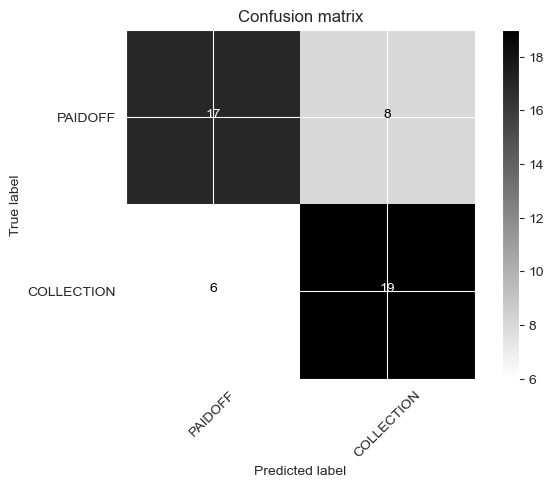

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

cmKNN = confusion_matrix(y_test, yhat_knn_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmKNN, classes=["PAIDOFF", "COLLECTION"], normalize=False, title="Confusion matrix"
)

### HERE (Code is out dated find other way to plot a roc curve)

In [16]:
# from sklearn import metrics
# from sklearn.metrics import plot_roc_curve
# from scikitplot.metrics import plot_roc_curve
# from sklearn.metrics import RocCurveDisplay

# metrics.plot_roc_curve(eKNN, X_test, y_test)
# plt.show()

In [17]:
from sklearn.metrics import log_loss, jaccard_score, classification_report

print ("KNN - Logloss é: %.2f" % log_loss(y_test, yhat_prob_knn))
print ("KNN - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_knn_pred, pos_label='PAIDOFF'))
print ("KNN - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_knn_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_knn_pred))

KNN - Logloss é: 4.66
KNN - Jaccard para PAIDOFF é: 0.55
KNN - Jaccard para COLLECTION é: 0.58
              precision    recall  f1-score   support

  COLLECTION       0.70      0.76      0.73        25
     PAIDOFF       0.74      0.68      0.71        25

    accuracy                           0.72        50
   macro avg       0.72      0.72      0.72        50
weighted avg       0.72      0.72      0.72        50



## Decision Tree

### Modeling

In [18]:
from sklearn.tree import DecisionTreeClassifier

eTree = DecisionTreeClassifier(criterion="entropy", max_depth=4)
eTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [19]:
eTree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Visualization

In [20]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

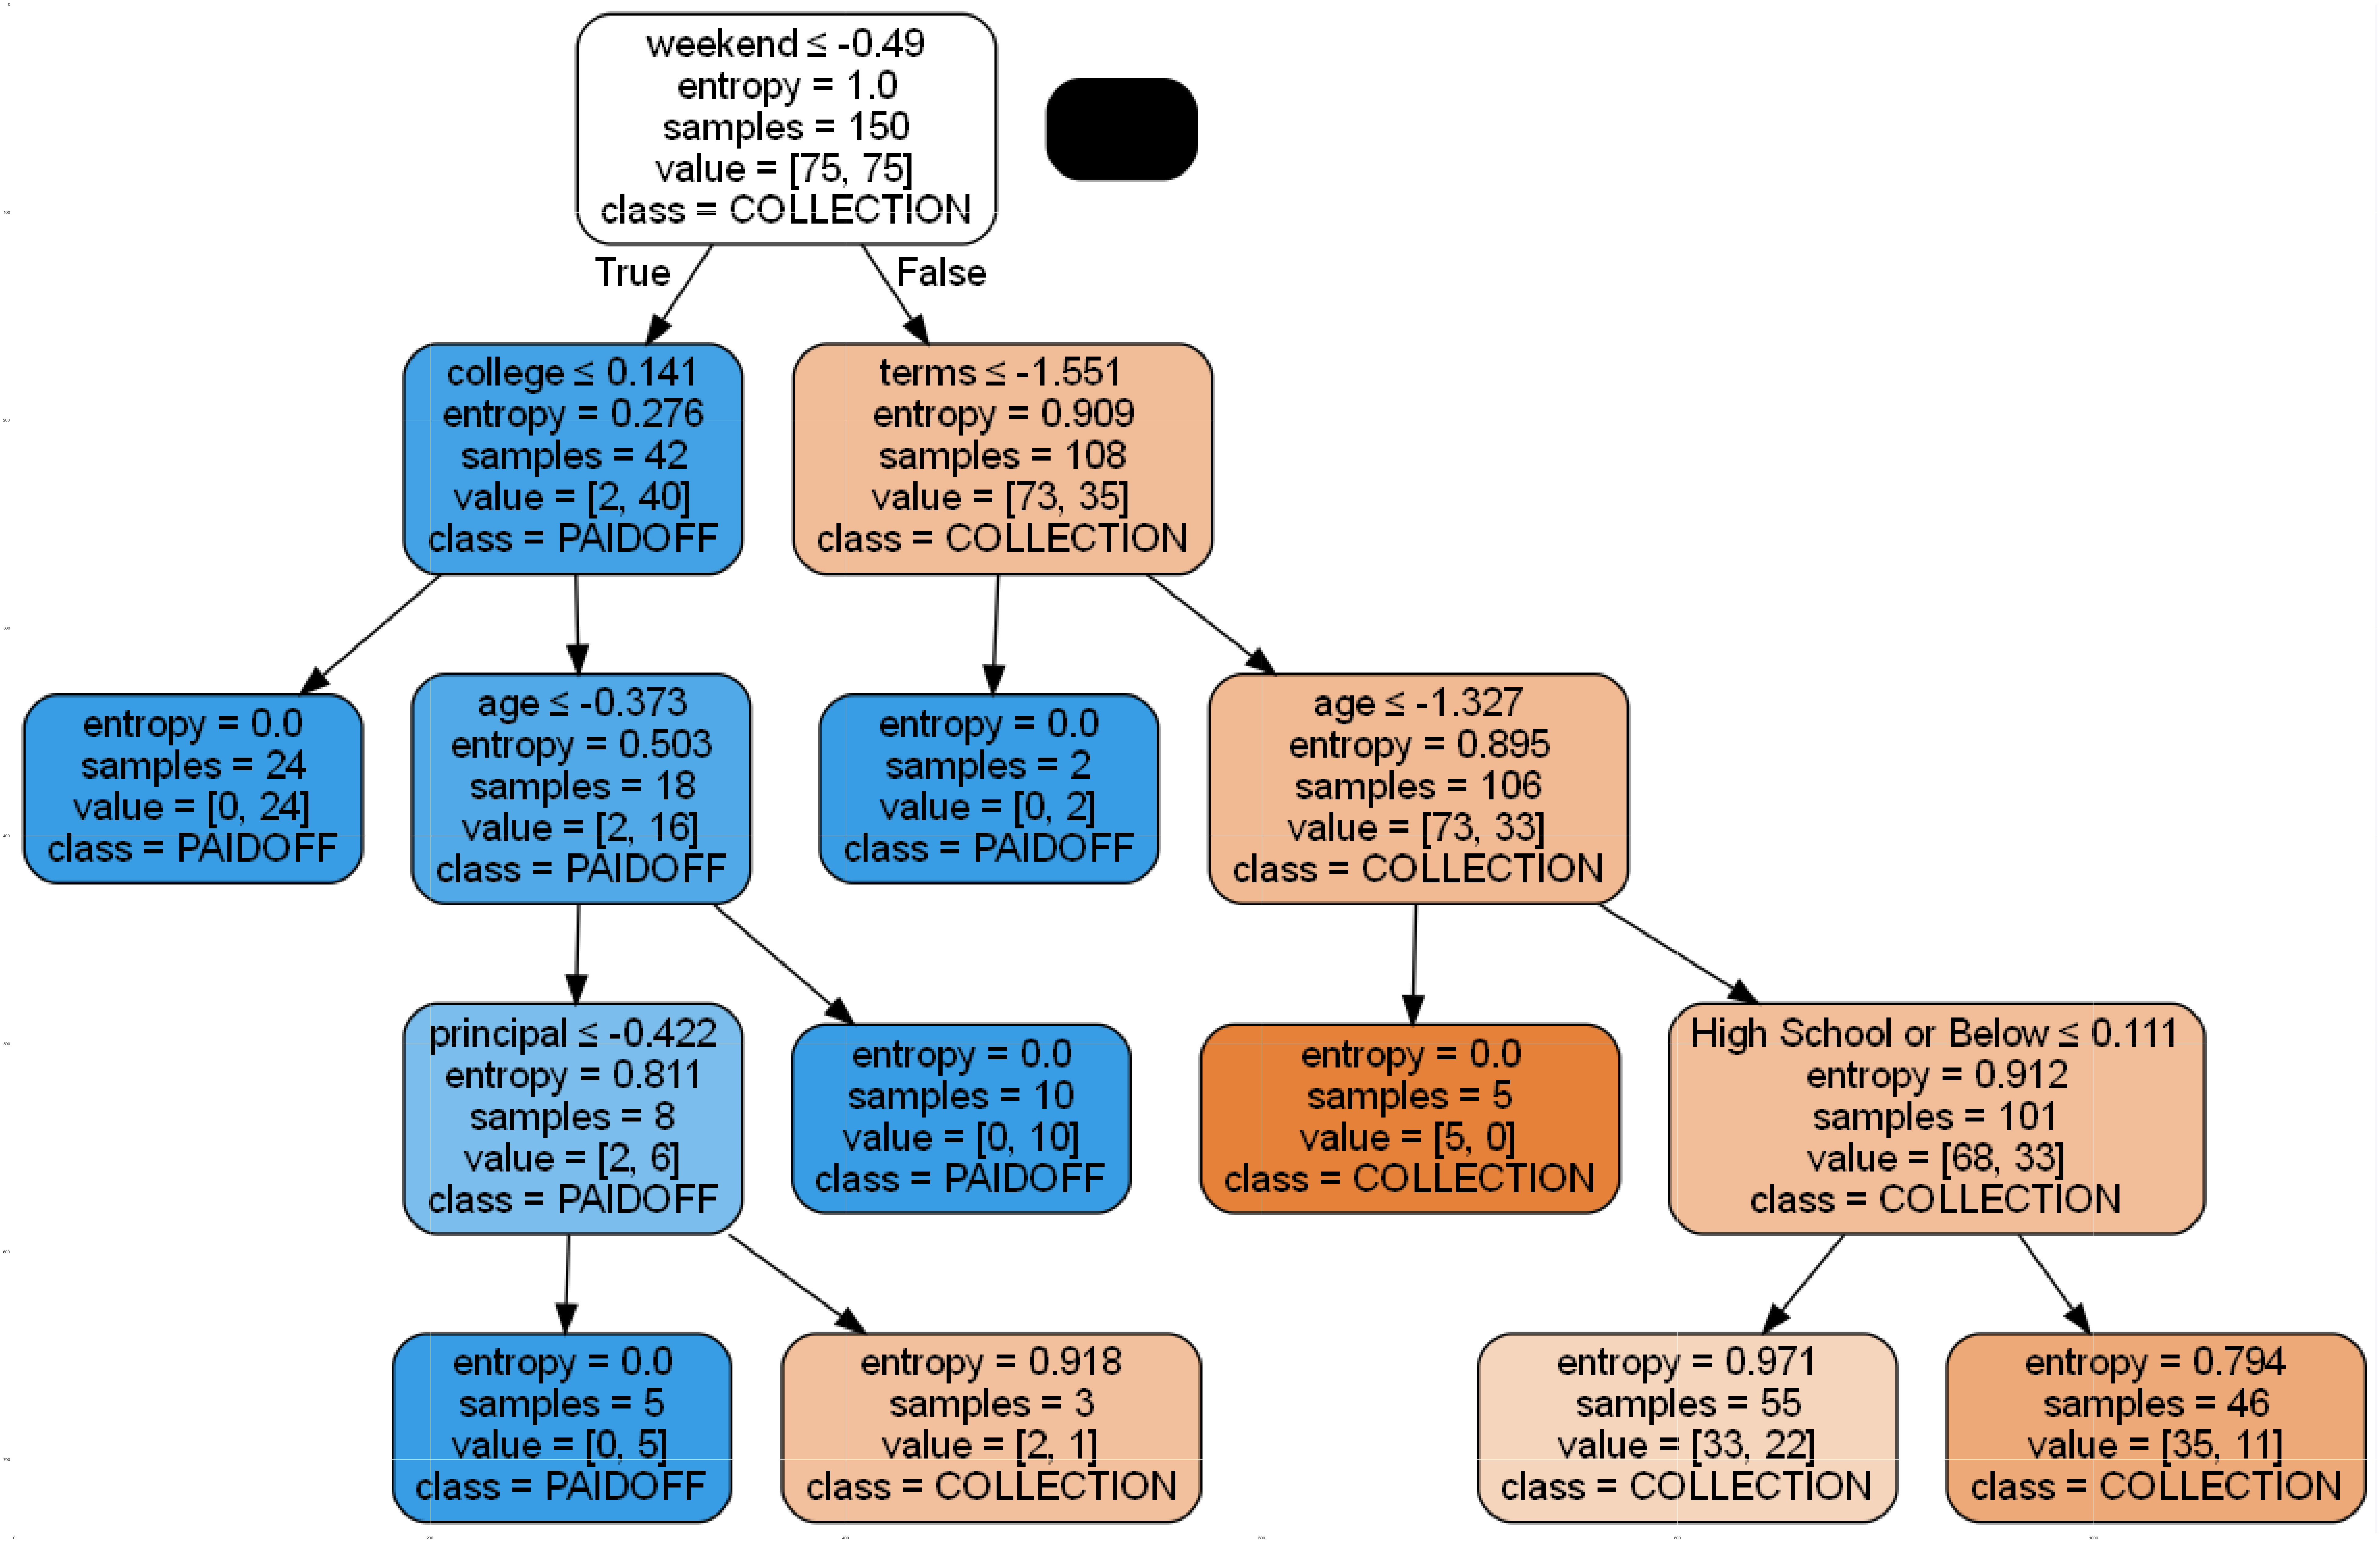

In [21]:
dot_data = StringIO()
filename = "eTree(Resampling).png"
featureNames = features.columns[:]
out = tree.export_graphviz(
    eTree,
    feature_names=featureNames,
    out_file=dot_data,
    class_names=np.unique(y_train),
    filled=True,
    proportion=False,
    rotate=False,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation="nearest")

### Evaluate DT Predict

In [22]:
yhat_dt_pred = eTree.predict(X_test)
yhat_prob_dt = eTree.predict_proba(X_test)

### DT Model Accuracy

Confusion matrix, without normalization


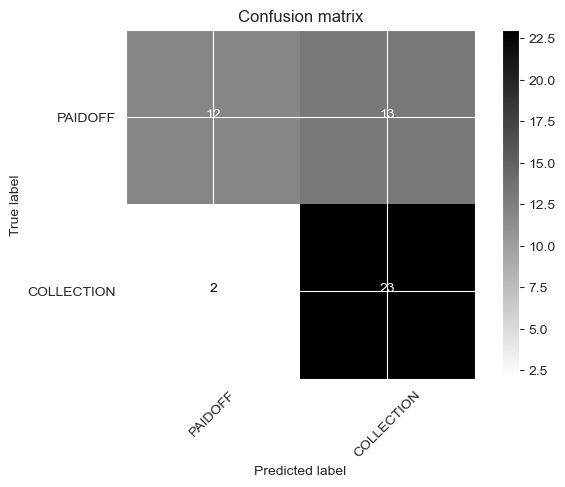

In [23]:
cmDT = confusion_matrix(y_test, yhat_dt_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmDT, classes=["PAIDOFF", "COLLECTION"], normalize=False, title="Confusion matrix"
)

In [24]:
# metrics.plot_roc_curve(eTree, X_test, y_test)
# plt.show()

In [25]:
print ("DT - Logloss é: %.2f" % log_loss(y_test, yhat_prob_dt))
print ("DT - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_dt_pred, pos_label='PAIDOFF'))
print ("DT - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_dt_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_dt_pred))

DT - Logloss é: 2.60
DT - Jaccard para PAIDOFF é: 0.44
DT - Jaccard para COLLECTION é: 0.61
              precision    recall  f1-score   support

  COLLECTION       0.64      0.92      0.75        25
     PAIDOFF       0.86      0.48      0.62        25

    accuracy                           0.70        50
   macro avg       0.75      0.70      0.68        50
weighted avg       0.75      0.70      0.68        50



## SVM

### Modeling

In [26]:
import scipy.optimize as opt
from sklearn import svm

eSVMrbf = svm.SVC(kernel="rbf")
eSVMrbf.fit(X_train, y_train)

SVC()

In [27]:
eSVMpoly = svm.SVC(kernel="poly")
eSVMpoly.fit(X_train, y_train)

SVC(kernel='poly')

In [28]:
eSVMsig = svm.SVC(kernel="sigmoid")
eSVMsig.fit(X_train, y_train)

SVC(kernel='sigmoid')

### Evaluate SVM Predict

In [29]:
yhat_SVMrbf_pred = eSVMrbf.predict(X_test)
yhat_SVMpoly_pred = eSVMpoly.predict(X_test)
yhat_SVMsig_pred = eSVMsig.predict(X_test)

### SVM Model Accuracy 

Confusion matrix, without normalization
Confusion matrix, without normalization
Confusion matrix, without normalization


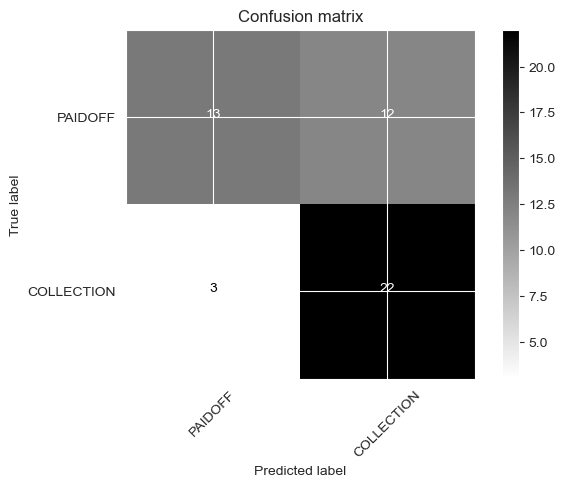

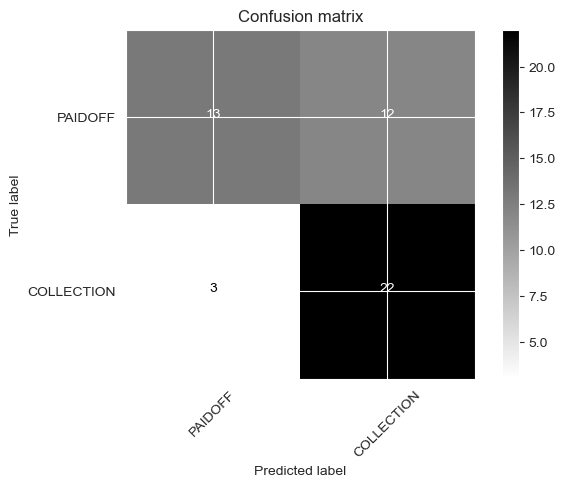

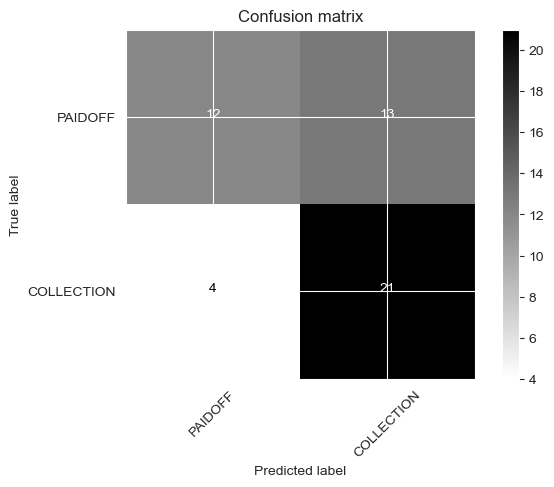

In [30]:
cmSVMrbf = confusion_matrix(y_test, yhat_SVMrbf_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmSVMrbf,
    classes=["PAIDOFF", "COLLECTION"],
    normalize=False,
    title="Confusion matrix",
)

###############################################

cmSVMrbf = confusion_matrix(y_test, yhat_SVMpoly_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmSVMrbf,
    classes=["PAIDOFF", "COLLECTION"],
    normalize=False,
    title="Confusion matrix",
)

###############################################

cmSVMrbf = confusion_matrix(y_test, yhat_SVMsig_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmSVMrbf,
    classes=["PAIDOFF", "COLLECTION"],
    normalize=False,
    title="Confusion matrix",
)

In [31]:
# metrics.plot_roc_curve(eSVMrbf, X_test, y_test)
# metrics.plot_roc_curve(eSVMpoly, X_test, y_test)
# metrics.plot_roc_curve(eSVMsig, X_test, y_test)
# plt.show()

In [32]:
# SVM Radical Basis Function
print ("SVM Radical Basis Function - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_SVMrbf_pred, pos_label='PAIDOFF'))
print ("SVM Radical Basis Function - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_SVMrbf_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_SVMrbf_pred))
print()

# SVM Polynomial
print ("SVM Polynomial - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_SVMpoly_pred, pos_label='PAIDOFF'))
print ("SVM Polynomial - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_SVMpoly_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_SVMpoly_pred))
print()

# SVM Sigmoid
print ("SVM Sigmoid - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_SVMsig_pred, pos_label='PAIDOFF'))
print ("SVM Sigmoid - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_SVMsig_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_SVMsig_pred))

SVM Radical Basis Function - Jaccard para PAIDOFF é: 0.46
SVM Radical Basis Function - Jaccard para COLLECTION é: 0.59
              precision    recall  f1-score   support

  COLLECTION       0.65      0.88      0.75        25
     PAIDOFF       0.81      0.52      0.63        25

    accuracy                           0.70        50
   macro avg       0.73      0.70      0.69        50
weighted avg       0.73      0.70      0.69        50


SVM Polynomial - Jaccard para PAIDOFF é: 0.46
SVM Polynomial - Jaccard para COLLECTION é: 0.59
              precision    recall  f1-score   support

  COLLECTION       0.65      0.88      0.75        25
     PAIDOFF       0.81      0.52      0.63        25

    accuracy                           0.70        50
   macro avg       0.73      0.70      0.69        50
weighted avg       0.73      0.70      0.69        50


SVM Sigmoid - Jaccard para PAIDOFF é: 0.41
SVM Sigmoid - Jaccard para COLLECTION é: 0.55
              precision    recall  f1-sco

## Logistic Regression

### Modeling

In [33]:
from sklearn.linear_model import LogisticRegression
eLr = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
eLr

LogisticRegression(C=0.01, solver='liblinear')

### Evaluate LR Predict

In [34]:
yhat_lr_pred = eLr.predict(X_test)
yhat_prob_lr = eLr.predict_proba(X_test)

### LR Model Accuracy

Confusion matrix, without normalization


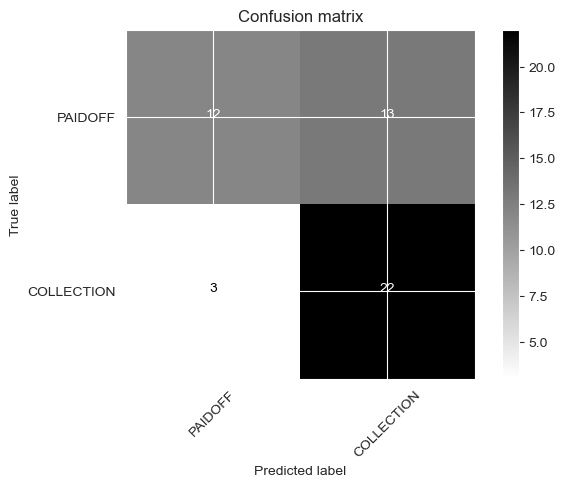

In [35]:
cmLR = confusion_matrix(y_test, yhat_lr_pred, labels=["PAIDOFF", "COLLECTION"])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(
    cmLR, classes=["PAIDOFF", "COLLECTION"], normalize=False, title="Confusion matrix"
)

In [36]:
# metrics.plot_roc_curve(eLr, X_test, y_test)
# plt.show()

In [37]:
print ("LR - Logloss é: %.2f" % log_loss(y_test, yhat_prob_lr))
print ("LR - Jaccard para PAIDOFF é: %.2f" % jaccard_score(y_test, yhat_lr_pred, pos_label='PAIDOFF'))
print ("LR - Jaccard para COLLECTION é: %.2f" % jaccard_score(y_test, yhat_lr_pred, pos_label='COLLECTION'))
print (classification_report(y_test, yhat_lr_pred))

LR - Logloss é: 0.64
LR - Jaccard para PAIDOFF é: 0.43
LR - Jaccard para COLLECTION é: 0.58
              precision    recall  f1-score   support

  COLLECTION       0.63      0.88      0.73        25
     PAIDOFF       0.80      0.48      0.60        25

    accuracy                           0.68        50
   macro avg       0.71      0.68      0.67        50
weighted avg       0.71      0.68      0.67        50

